In [122]:
#step 1 import required packages
import pandas as pd # load pandas package for importing csv files in correct format
# import as defines the identifier you want to use for the function e.g in this case 
# pd will call the pandas package
import matplotlib # load matplotlib package for plotting graphs
import os
import matplotlib.pyplot as plt #import matplotlib.pyplot package for plotting boxplots

In [129]:
def import_OP_data(filename):
    """This function imports an csv file (ideally downloaded from the Open Prescribing website) into a 
    dataframe for analysis in Python. Please enter the name of the  csv file you wish to import"""
    data = pd.read_csv(filename, sep=',')#load OP data to filter out a subset for testing all scripts
    dataframe = pd.DataFrame(data) #Convert imported data to a dataframe using pandas
    return print('These are the first 3 rows of the dataset. Does it look correct?', dataframe.head(3)) 
    #view the first three lines of the dataframe to check import has been successful

In [130]:
import_OP_data('measures.csv')

These are the first 3 rows of the dataset. Does it look correct?             measure  org_type  org_id                                org_name  \
0  ktt9_antibiotics  practice  P84650                  THE ALEXANDRA PRACTICE   
1  ktt9_antibiotics  practice  P84673  ANCOATS URBAN VILLAGE MEDICAL PRACTICE   
2  ktt9_antibiotics  practice  P84071                       WILBRAHAM SURGERY   

         date  numerator  denominator  calc_value  percentile  
0  2014-10-01      199.0  3106.653507    0.064056    9.181078  
1  2014-10-01      463.0  4252.799604    0.108869   75.864700  
2  2014-10-01      219.0  2275.856965    0.096227   57.540692  


In [131]:
help(import_OP_data)

Help on function import_OP_data in module __main__:

import_OP_data(filename)
    This function imports an csv file (ideally downloaded from the Open Prescribing website)into a dataframe; 
    for analysis in Python. Please enter the name of the  csv file you wish to import



In [132]:
def remove_OP_artifacts(dataframe):
    """This function identifies and removes entries within the OpenPrescribing dataset which have zero 
    prescriptions recorded. Database entries (rows) with 0.0 prescriptions need to be removed from the 
    database as these are artifacts and will skew outlier calculations; an active GP surgery is very 
    unlikely to issue zero prescriptions! If any GP practices are identified. The script will return 
    the number of artifacts detected (if any), and state how the datset has been analysed e.g. if the 
    artifacts have been removed."""
    
    dataframe_Sort = dataframe.sort_values("numerator")#sort dataframe based on number of prescriptions
    PCo = len(dataframe_Sort[dataframe_Sort['numerator'] == 0.0]) 
    #count number of rows with 0 prescriptions
    AntiP =  dataframe_Sort['numerator']>0.0 #Identify all rows with a prescription value greater than 0.0
    df_SF = dataframe_Sort[AntiP] 
    #Filter the dataset, keeping all rows with prescriptions >0 (i.e. = 'TRUE')  
    df_SF_min = min(df_SF.numerator) 
    #Check all rows with 0 prescriptions have been removed i.e minimum value is > 0.0
    if PCo>0: #Create an if statement to interpret the presence of rows with 0 prescriptions
        return print('This dataset contains', PCo, 
                  'entries with 0 prescriptions. These entries have been removed from the dataset.', 
                  'The smallest number of prescriptions is:', df_SF_min, 'per 1000 patients')
        #print warning meassage to user outlining the number of blank rows detected using an if statement 
    else:
        return print('This dataset contains', PCo, 
          'entries with 0 prescriptions. No entries have been removed from the dataset.',
                     ' The smallest number of prescriptions is:', PCo) 
    #Notify the user if no rows were found with zero prescriptions

In [133]:
remove_OP_artifacts(dataframe)

This dataset contains 345 entries with 0 prescriptions. These entries have been removed from the dataset. The smallest number of prescriptions is: 1.0 per 1000 patients


In [134]:
help(remove_OP_artifacts)

Help on function remove_OP_artifacts in module __main__:

remove_OP_artifacts(dataframe)
    This function identifies and removes entries within the OpenPrescribing dataset which have zero prescriptions 
    recorded. Database entries (rows) with 0.0 prescriptions need to be removed from the database as these are 
    artifacts and will skew outlier calculations; an active GP surgery is very unlikely to issue zero prescriptions! 
    If any GP practices are identified. The script will return the number of artifacts detected (if any), and state 
    how the datset has been analysed e.g. if the artifacts have been removed.



In [135]:
def remove_OP_IQRoutliers(dataframe):
    """This script identifies outliers within the dataset, based on IQR criteria. The lower and upper 
    limit for outliers are displayed alongside the IQR. A boxplot for the dataset is produced and a 
    unique list of GP surgeries with prescription outliers are listed """
    dataframe_Sort = dataframe.sort_values("numerator")#sort dataframe based on number of prescriptions
    AntiP =  dataframe_Sort['numerator']>0.0 
    #Identify all rows with a prescription value greater than 0.0
    df_SF = dataframe_Sort[AntiP]
    #Calculate IQR
    q1 = df_SF['numerator'].quantile(0.25)#Q1
    q3 = df_SF['numerator'].quantile(0.75)#Q3
    iqr = df_SF['numerator'].quantile(0.75)-df_SF['numerator'].quantile(0.25) #calculate IQR
    #Calclate lower limit for outliers
    LowOut = q1 - 1.5 * iqr #lower bound
    #Calculate upper limit for outliers
    HighOut = q3 + 1.5 * iqr #upper bound
    # Identify all rows with high and low outliers 
    Outliers = df_SF[(df_SF['numerator'] < LowOut) | (df_SF['numerator'] > HighOut)] #pipe (|) = OR
    #count number of outliers and print message to inform the user
    NoOutliers = len(Outliers['numerator'])
    plt.boxplot(Outliers.numerator) #plot boxplot for outliers...
    GPlist=Outliers.org_name.unique() # list unique name of practices with prescription outliers.
    #This list of names can be used to plot trends i.e. the graphical functions developed below.
    return print("The interquartile range:", iqr, '\nThe lower boundary for outliers is:', LowOut, 
                 '\nThe upper boundary for outliers is:', HighOut, '\nThis dataset contains', 
                 NoOutliers, 'Outliers, represented by the circles in the boxplot below.', 
                 '\nThis is a list of all the GP practices where antibioitc prescrition numbers',
                 ' have been identified as outliers:\n', GPlist)
    plt.show() 

The interquartile range: 219.0 
The lower boundary for outliers is: -151.5 
The upper boundary for outliers is: 724.5 
This dataset contains 154 Outliers, represented by the circles in the boxplot below. 
This is a list of all the GP practices where antibioitc prescrition numbers have been identified as outliers:
 ['BOWLAND MEDICAL PRACTICE' 'BENCHILL MEDICAL PRACTICE'
 'THE AVENUE MEDICAL CENTRE' 'VALENTINE MEDICAL CENTRE'
 'NEW COLLEGIATE MEDICAL CENTRE' "ST GEORGE'S MEDICAL CENTRE"
 'GORTON MEDICAL CENTRE' 'DIDSBURY MEDICAL CENTRE - DR WHITAKER'
 'NORTHENDEN GROUP PRACTICE' 'BODEY MEDICAL CENTRE'
 'PEEL HALL MEDICAL CENTRE' 'THE ROBERT DARBISHIRE PRACTICE'
 'CITY HEALTH CENTRE']


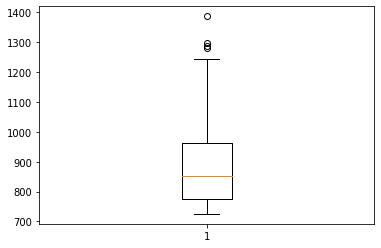

In [137]:
remove_OP_IQRoutliers(dataframe)

In [136]:
help(remove_OP_IQRoutliers)

Help on function remove_OP_IQRoutliers in module __main__:

remove_OP_IQRoutliers(dataframe)
    This script identifies outliers within the dataset, based on IQR criteria. The lower and upper limit 
    for outliers are displayed alongside the IQR. A boxplot for the dataset is produced and a unique list 
    of GP surgeries with prescription outliers are listed



In [143]:
def Plot_trends_all_surgeries(data):
    """The first definition provides the user the ability to view the trends data for every surgery
within a particular geographical area."""
    unique_org_ids = data['org_id'].unique() ##Get a list of the surgeries

    ax = plt.gca() ##Set the default axis for the graph

    for orgs_id in unique_org_ids: ##For each surgery in the list of unique surgery
        new_dataframe = data[data['org_id'] == str(orgs_id)] ##Get a new dataframe subset just for the one surgery 
        graph_points = new_dataframe[['date','numerator']] ##From the new dataframe, get the date and prescription number
    
        graph_points.plot(x='date',y='numerator', ax = ax) ##Plot date and prescriptions on same axis for all surgeries

    ax.get_legend().remove() ##Remove legend from graph, as very messy.
    plt.gcf().autofmt_xdate() ##Format the x-axis for date data
    plt.show() ##Show the plot

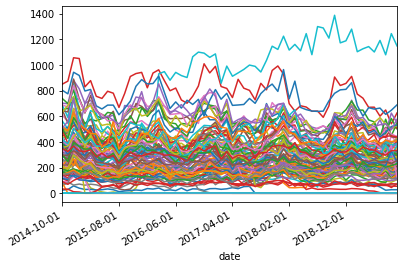

In [140]:
Plot_trends_all_surgeries(data)

In [144]:
help(Plot_trends_all_surgeries)

Help on function Plot_trends_all_surgeries in module __main__:

Plot_trends_all_surgeries(data)
    The first definition provides the user the ability to view the trends data for every surgery
    within a particular geographical area.



In [148]:
def Plot_trends_combined_surgeries(data):
    """This function shows the summed prescribing information for every surgery within the geographical area for
a particular timepoint. This is displayed from 2014-2019"""
    unique_date_ids = data['date'].unique() ##Get a list of all the reporting dates

    dates_axis = [] ##Initiate a list for dates
    summed_axis = [] ##Initiate a list to sum all data for that date

    for dates in unique_date_ids:
        dates_axis.append(dates) ##Append iterative dates to date_axis list
        new_dataframe = data[data['date'] == dates] ##Subset dataframe just for iterative date
        summed = new_dataframe['numerator'].sum() ##Sum the prescribing column
        summed_axis.append(summed) ##Append the sum to the list
    
    new_df = pd.DataFrame({'date_axis':dates_axis,'summed_axis':summed_axis}) ##Turn lists into dataframe to turn into a graph

    new_df.plot(x = 'date_axis', y = 'summed_axis') ##Plot new graph

    plt.gcf().autofmt_xdate() ##Format date axis
    plt.show() ##Show the plot.

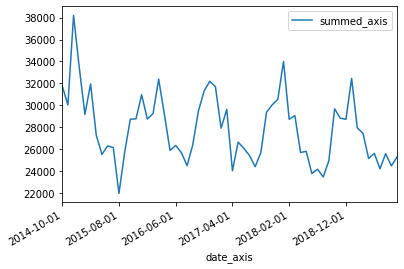

In [149]:
Plot_trends_combined_surgeries(data)

In [147]:
help(Plot_trends_combined_surgeries)

Help on function Plot_trends_combined_surgeries in module __main__:

Plot_trends_combined_surgeries(data)
    This function shows the summed prescribing information for every surgery within the geographical area for
    a particular timepoint. This is displayed from 2014-2019



In [152]:
def Plot_trends_pick_surgeries(data, name):
    """This function allows the user to provide the data, and provide either the name or the ID
of a surgery, and see the trend over time just for that surgery. This can be used as an investigational
tool into surgeries of interest (e.g outliers)

Note: Using organisation names are case sensitive"""
    if data['org_id'].str.endswith(name).any():
            
        ax = plt.gca() ##Set the default axis for the graph
    
        new_dataframe = data[data['org_id'] == str(name)] ##Get a new dataframe subset just for the one surgery 
        graph_points = new_dataframe[['date','numerator']] ##From the new dataframe, get the date and prescription number
    
        graph_points.plot(x='date',y='numerator', ax = ax) ##Plot date and prescriptions on same axis for all surgeries

        ax.legend(loc = 'upper right', labels=new_dataframe.iloc[0]['org_id'])
        plt.gcf().autofmt_xdate() ##Format the x-axis for date data
        plt.show() ##Show the plot
        
    elif data['org_name'].str.endswith(name).any():
        
        ax = plt.gca() ##Set the default axis for the graph
    
        new_dataframe = data[data['org_name'] == str(name)] ##Get a new dataframe subset just for the one surgery 
        graph_points = new_dataframe[['date','numerator']] ##From the new dataframe, get the date and prescription number
    
        graph_points.plot(x='date',y='numerator', ax = ax) ##Plot date and prescriptions on same axis for all surgeries

        ax.legend(loc = 'upper right', labels=new_dataframe.iloc[0]['org_id'])
        plt.gcf().autofmt_xdate() ##Format the x-axis for date data
        plt.show() ##Show the plot
        
        
    else:
        print('Could not find surgery!')

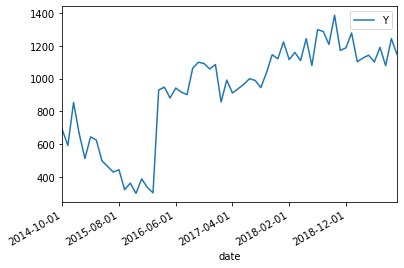

In [154]:
Plot_trends_pick_surgeries(data, 'Y02849')

In [155]:
help(Plot_trends_pick_surgeries)

Help on function Plot_trends_pick_surgeries in module __main__:

Plot_trends_pick_surgeries(data, name)
    This function allows the user to provide the data, and provide either the name or the ID
    of a surgery, and see the trend over time just for that surgery. This can be used as an investigational
    tool into surgeries of interest (e.g outliers)
    
    Note: Using organisation names are case sensitive



In [157]:
def Plot_trends_two_surgeries_by_IDs(data, name1, name2):
    """This function allows a user to pick any two surgeries and plot the prescribing information
on the same axis for both surgeries. This can be used to directly compare the prescribing
information for both surgeries.

So far, this function only works with organisation IDs and not organisation names."""
    if data['org_id'].str.endswith(name1).any() & data['org_id'].str.endswith(name2).any():
    
        ax = plt.gca() ##Set the default axis for the graph

        for two_id in name1, name2: ##For each surgery in the list of unique surgery
            new_dataframe = data[data['org_id'] == str(two_id)] ##Get a new dataframe subset just for the one surgery 
            graph_points = new_dataframe[['date','numerator']] ##From the new dataframe, get the date and prescription number
    
            graph_points.plot(x='date',y='numerator', ax = ax) ##Plot date and prescriptions on same axis for all surgeries

        new_dataframe1 = data[data['org_id'] == str(name1)] ##Get a new dataframe subset just for the one surgery 
        legend_points1 = new_dataframe1[['org_id','org_name']] ##From the new dataframe, get the date and prescription number
        
        new_dataframe2 = data[data['org_id'] == str(name2)] ##Get a new dataframe subset just for the one surgery 
        legend_points2 = new_dataframe2[['org_id','org_name']] ##From the new dataframe, get the date and prescription number
                
        legendname1 = legend_points1.iloc[0]['org_id'] + ', ' + legend_points1.iloc[0]['org_name']
        legendname2 = legend_points2.iloc[0]['org_id'] + ', ' + legend_points2.iloc[0]['org_name']
        
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), labels=(legendname1, legendname2))
        plt.gcf().autofmt_xdate() ##Format the x-axis for date data
        plt.show() ##Show the plot
    
    else:
        print('One of the surgery IDs is incorrect!')

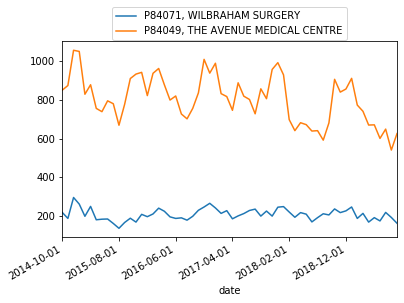

In [158]:
Plot_trends_two_surgeries_by_IDs(data, 'P84071', 'P84049')

In [159]:
help(Plot_trends_two_surgeries_by_IDs)

Help on function Plot_trends_two_surgeries_by_IDs in module __main__:

Plot_trends_two_surgeries_by_IDs(data, name1, name2)
    This function allows a user to pick any two surgeries and plot the prescribing information
    on the same axis for both surgeries. This can be used to directly compare the prescribing
    information for both surgeries.
    
    So far, this function only works with organisation IDs and not organisation names.

